## Import and Initialization

In [87]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

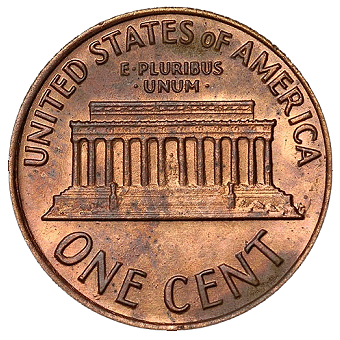

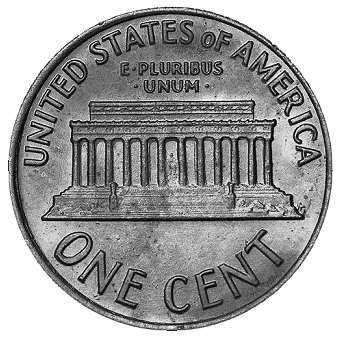

In [106]:
# Original image :-
img = cv.imread("momo.jpg")
cv2_imshow(img)
# Grey-scale conversion :-
img2 = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv2_imshow(img2)

## Low Pass Filter

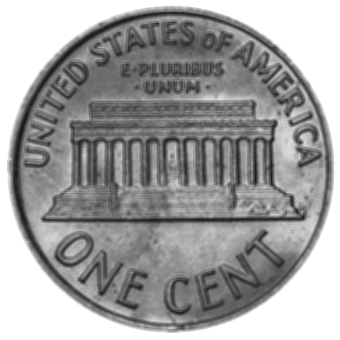

In [108]:
# Applying a basic low pass filter :-
kernel = np.ones((4, 4), np.float32) / 16
dst = cv.filter2D(img2, -1, kernel)
cv2_imshow(dst)

## Canny edge detection

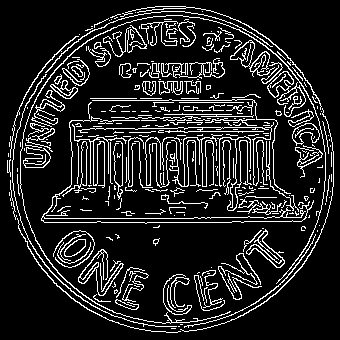

In [109]:
# Canny edge detection on smooth image:-
dst2 = cv.Canny(dst, 70, 120, L2gradient=True)
cv2_imshow(dst2)

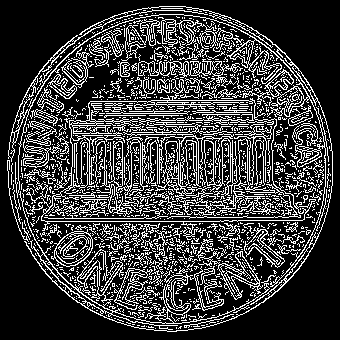

In [110]:
# Canny edge detection on original image :-
dst3 = cv.Canny(img2, 70, 120, L2gradient=True)
cv2_imshow(dst3) 

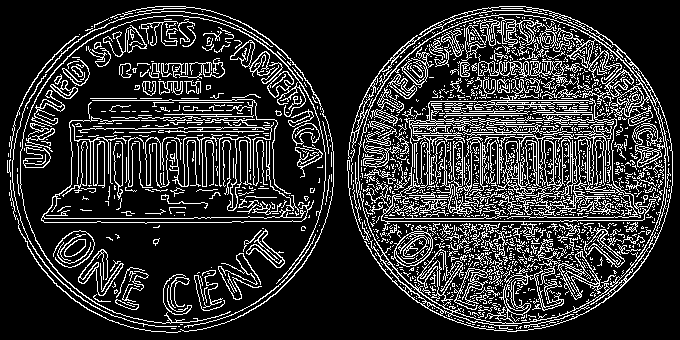

In [111]:
# Comparison between original and smooth image :-
cv2_imshow(np.hstack((dst2, dst3)))

## cv.contours() on greyscale image

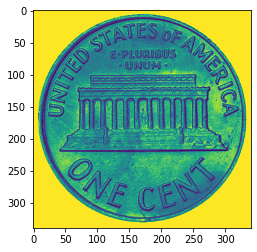

In [135]:
contours, _ = cv.findContours(img2, cv.RETR_EXTERNAL, 
                              cv.CHAIN_APPROX_NONE)
contours = sorted(contours, key=cv.contourArea, reverse=True)
img_copy1 = img2.copy()
final1 = cv.drawContours(img_copy1, contours, contourIdx=-1,
                        color=(255, 0, 0), thickness=2)
plt.imshow(final1)

## cv.contours() on edges

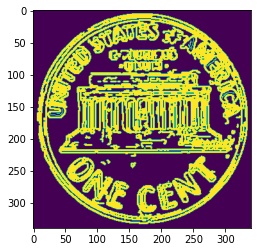

In [134]:
contours, _ = cv.findContours(dst2, cv.RETR_EXTERNAL, 
                              cv.CHAIN_APPROX_NONE)
contours = sorted(contours, key=cv.contourArea, reverse=True)
img_copy2 = dst2.copy()
final2 = cv.drawContours(img_copy2, contours, contourIdx=-1,
                        color=(255, 0, 0), thickness=2)
plt.imshow(final2)

## Comparison among contours()

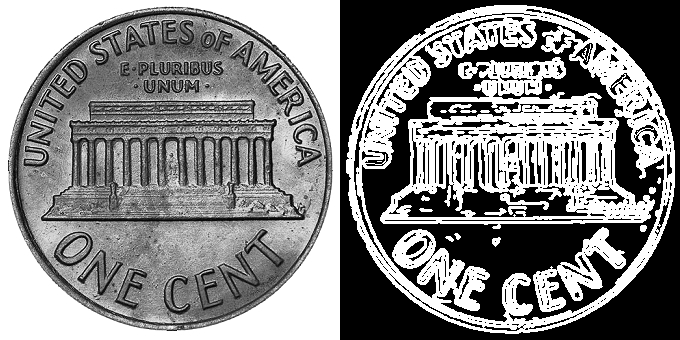

In [133]:
res = np.hstack((final1, final2))
cv2_imshow(res)